<a href="https://colab.research.google.com/github/panimesh14/Bayesian-Learning-and-Simulation/blob/main/Bayesian_Coin_Toss_Simulation_Experiments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Coin Tossing Experiment using Bayesian Simulation:Practice

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
theta=[0, 1];#Binomial outcomes of toss-0 for tails, 1 for heads

In [205]:
def prior(N):
    #prior=np.random.random(N);#Random Prior
    #prior=prior/np.sum(prior)
    r=np.arange(N)/(N-1);
    #Gaussian Prior
    prior=sp.stats.norm.pdf(r,loc=0.5,scale=1)
    plt.subplot(3,1,1)    
    plt.plot(np.arange(N)/(N-1),prior,'--k')    
    plt.ylabel('Initial Prior')
    plt.title('Coin Toss Simulation') 
    return prior

In [ ]:
def toss():
    t=np.random.random(1);#chances of occurring of heads
    if(t>0.5):
       return 0;#decrease/reassign probability of tails as heads occurred
    else:
       return 1;#decrease probability of heads as tails occurred

In [226]:
def likelihood(N):
    rv=[ind/(N-1) for ind in range(N)]#random variable
    #x=[np.exp(-ind/N) for ind in range(N)]#Gaussian Likelihood function for trial
    #r=np.arange(N)/(N-1);
    #x=sp.stats.norm.pdf(rv,loc=0.5,scale=1)#Gaussian Likelihood
    x=sp.stats.beta.pdf(rv,a=2,b=5,loc=0,scale=1)#Beta prior, essentially uniform for a=b=1
    return x

In [218]:
def posterior(prior,toss):
#Note: Likelihood function assumed here=n/(N-1) for theta=0 and 1-n/(N-1)
    N=prior.shape;
    N=N[0];
    p=likelihood(N);
    p=np.array(p)
    if(toss==0):
       updated_prior=np.multiply(p,prior);
    else:
       updated_prior=np.multiply(1-p,prior);
    return updated_prior

In [ ]:
def CoinSimulation(N):
    #N=number of tosses
    toss_prior=prior(N);
    #prior=toss_prior;
    for i in range(N):
        t=toss();
        toss_prior=posterior(toss_prior,t);
    final_posterior=toss_prior;
    likelihood_dist=likelihood(N);
    rv=np.arange(N)/(N-1);#random variable values
    #Likelihood Function plot
    plt.subplot(3,1,2)
    plt.plot(rv,likelihood_dist)
    plt.ylabel('Likelihood')
    #plt.xlabel('Random Variable')
    
    #Posterior Estimate Plot
    plt.subplot(3,1,3)
    plt.plot(rv,final_posterior)
    plt.ylim([0,np.max(final_posterior)])
    plt.xlabel('Random Variable')
    plt.ylabel('Posterior Probability')
    
    max_prob_ind=np.argmax(final_posterior);
    map_estimate=final_posterior[max_prob_ind];
    max_rv_val=rv[max_prob_ind]
    return map_estimate,max_rv_val

# Gaussian Likelihood

(0.009151085687111097, 0.5)

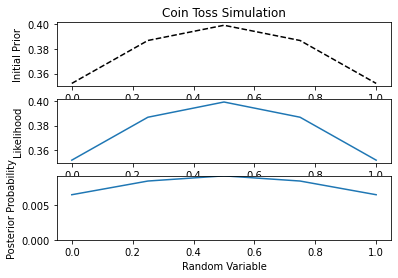

In [ ]:
CoinSimulation(5)

(2.5335113040178316e-09, 0.5)

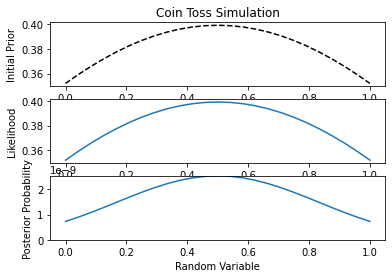

In [ ]:
CoinSimulation(25)

(9.673391320963096e-30, 0.06)

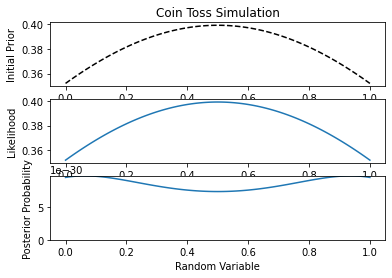

In [ ]:
CoinSimulation(101)

(3.822870834580464e-65, 0.5)

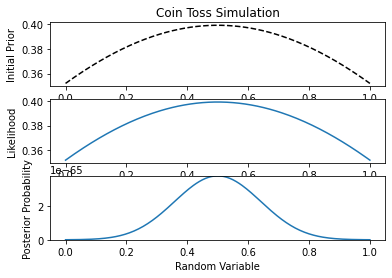

In [ ]:
CoinSimulation(201)

(2.258203190934429e-94, 0.5)

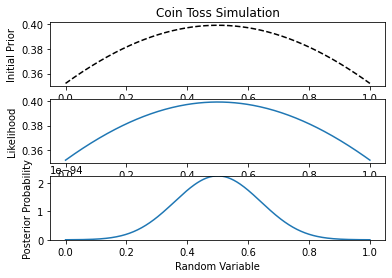

In [ ]:
CoinSimulation(301)

(1.0739790220761806e-127, 0.5)

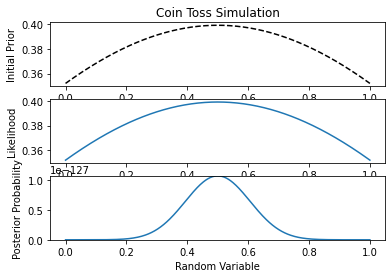

In [ ]:
CoinSimulation(401)

(2.53760611485758e-155, 0.5)

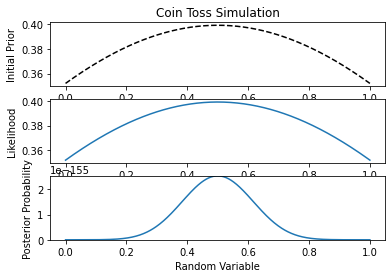

In [ ]:
CoinSimulation(501)

(2.4380843488743077e-217, 0.5)

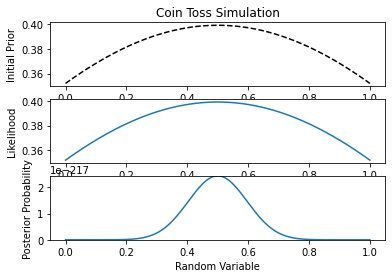

In [ ]:
CoinSimulation(701)

(6.849437394163538e-280, 0.5)

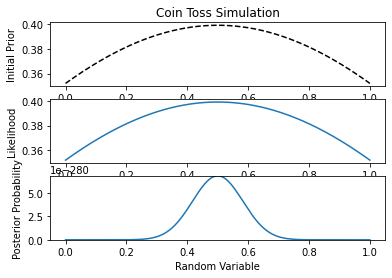

In [ ]:
CoinSimulation(901)

(8.375848417577127e-285, 0.499455930359086)

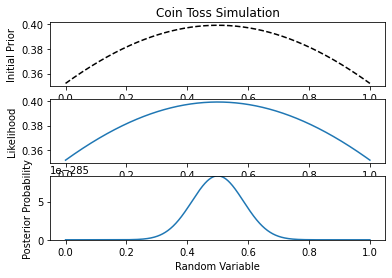

In [ ]:
CoinSimulation(920)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


(0.0, 0.0)

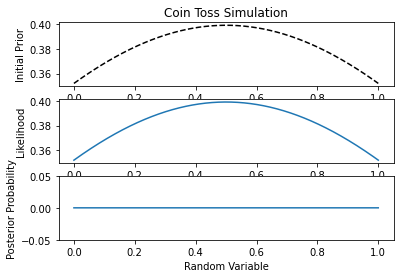

In [ ]:
CoinSimulation(10001)
#Seems like overflow or underflow

#Gaussian Prior and Gaussian Likelihood
##### With increasing number of samples, the solution MAP(Maximum a posterior) estimate converges to 0.5 pointing to an unbiased coin. 
##### The Coin toss simulation seems to converge to 0.5 with increase in number of candidate flips/samples.
##### The simulation shows that the posterior seeks to converge to a delta function centered at or around 0.5 with increase in number of tosses.
##### However, with very large increase in number of samples, the posterior estimate falls to very low so that an underflow occurs(<order of 10^(-285)). Else, this requires more investigation and testing. Open to suggestions.

#Beta likelihood function

In [ ]:
CoinSimulation(11)
#Posterior tries to match likelihood estimate

(1.4190495501086798e-07, 0.55)

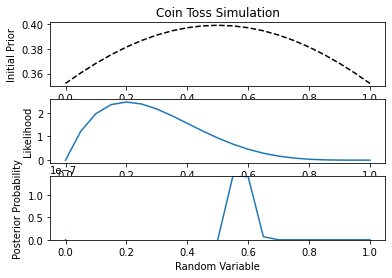

In [243]:
CoinSimulation(21)

(1.7208204392203837e-13, 0.6)

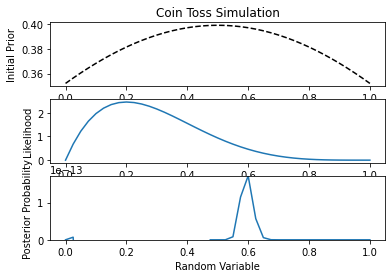

In [248]:
CoinSimulation(41)

(9.749382277092232e-92, 0.59)

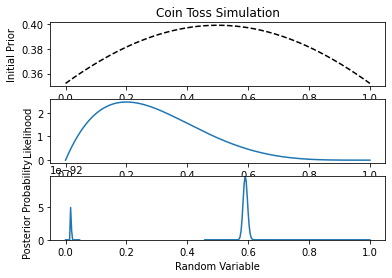

In [246]:
CoinSimulation(301)

(7.1237241555771e-152, 0.594)

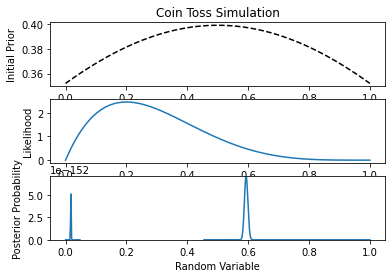

In [251]:
CoinSimulation(501)

#####Posterior seems to attempt to follow the prior but gets influenced by the likelihood estimate with increase in number of samples for simulation.
##### Essentially the posterior seems to show two peaks at around (apprpximate range) 0.01-0.1 and 0.5-0.6.
#####Beta likelihood with alpha=2 and beta=5 and Gaussian prior centered at mean 0.5 with standard deviation 1. Stability may also be an issue that may be looked at and more investigation/suggestion needed.